In [5]:
#First file 
import sklearn
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import datetime as dt
#a

In [6]:
# Load files
DIRECTORY_WHERE_THIS_FILE_IS = os.path.dirname(os.path.abspath("EDA"))
DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/location.csv")
df1 = pd.read_csv(DATA_PATH, parse_dates=["fecha"])

DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/demographics.csv")
df2 = pd.read_csv(DATA_PATH, parse_dates=["fecha"])

#check origin file
#DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/movement.xls")
#df3 = pd.read_excel(DATA_PATH)

In [7]:
df1

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,A,2020-01-01,0,0,0,0,0,0
1,AB,2020-01-01,0,0,0,0,0,0
2,AL,2020-01-01,0,0,0,0,0,0
3,AV,2020-01-01,0,0,0,0,0,0
4,B,2020-01-01,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
29039,V,2021-07-01,0,0,0,0,0,0
29040,VA,2021-07-01,0,0,0,0,0,0
29041,VI,2021-07-01,0,0,0,0,0,0
29042,Z,2021-07-01,0,0,0,0,0,0


In [8]:
#Convert to day of the year
df1['dayyear'] = df1['fecha']
print(df1.shape)
for el in range(0, len(df1['fecha'])):
    day_of_year =  pd.to_datetime(df1.iloc[el,8]).timetuple().tm_yday
    df1.iloc[el,8] = day_of_year
    if el == 15000:
        print("processing halfway")
#dummy collumn for year 
df1['year'] = pd.DatetimeIndex(df1['fecha']).year

(29044, 9)
processing halfway


In [9]:
#Merging
complete_df = pd.merge(df1, df2, how='left', on=['provincia_iso','fecha'])

In [10]:
#remov dupl col
#complete_df= complete_df.drop(['num_casos_y'], axis=1)

In [11]:
complete_df.tail(5)

,provincia_iso,fecha,num_casos_x,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,dayyear,year,sexo,grupo_edad,num_casos_y,num_hosp,num_uci,num_def
871315,ZA,2021-07-01,0,0,0,0,0,0,182,2021,NC,50-59,0,0,0,0
871316,ZA,2021-07-01,0,0,0,0,0,0,182,2021,NC,60-69,0,0,0,0
871317,ZA,2021-07-01,0,0,0,0,0,0,182,2021,NC,70-79,0,0,0,0
871318,ZA,2021-07-01,0,0,0,0,0,0,182,2021,NC,80+,0,0,0,0
871319,ZA,2021-07-01,0,0,0,0,0,0,182,2021,NC,NC,0,0,0,0


In [12]:
complete_df.describe()

,num_casos_x,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,year,num_casos_y,num_hosp,num_uci,num_def
count,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000,871320.000000
mean,131.571202,100.846337,0.164337,28.182792,0.525720,1.852018,2020.332117,4.385707,0.423727,0.040218,0.092828
std,350.476197,274.897114,1.179355,117.225121,4.809419,21.144481,0.470973,18.264819,2.900997,0.338184,0.935788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,28.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,0.000000,0.000000,0.000000,0.000000
75%,116.000000,91.000000,0.000000,15.000000,0.000000,0.000000,2021.000000,2.000000,0.000000,0.000000,0.000000
max,7017.000000,6602.000000,32.000000,3251.000000,115.000000,702.000000,2021.000000,889.000000,269.000000,35.000000,100.000000


In [13]:
print("There are {} different provinces".format(len(complete_df['provincia_iso'].unique())))


#Navarra code problem
complete_df.loc[complete_df['provincia_iso'].isna() == True,:]

There are 53 different provinces


,provincia_iso,fecha,num_casos_x,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,dayyear,year,sexo,grupo_edad,num_casos_y,num_hosp,num_uci,num_def
930,NaN,2020-01-01,0,0,0,0,0,0,1,2020,H,0-9,0,0,0,0
931,NaN,2020-01-01,0,0,0,0,0,0,1,2020,H,10-19,0,0,0,0
932,NaN,2020-01-01,0,0,0,0,0,0,1,2020,H,20-29,0,0,0,0
933,NaN,2020-01-01,0,0,0,0,0,0,1,2020,H,30-39,0,0,0,0
934,NaN,2020-01-01,0,0,0,0,0,0,1,2020,H,40-49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870685,NaN,2021-07-01,0,0,0,0,0,0,182,2021,NC,50-59,0,0,0,0
870686,NaN,2021-07-01,0,0,0,0,0,0,182,2021,NC,60-69,0,0,0,0
870687,NaN,2021-07-01,0,0,0,0,0,0,182,2021,NC,70-79,0,0,0,0
870688,NaN,2021-07-01,0,0,0,0,0,0,182,2021,NC,80+,0,0,0,0


In [14]:
complete_df.loc[:,'provincia_iso'] = complete_df.loc[:,'provincia_iso'].replace("","NA").fillna("NA")

In [15]:
print(complete_df['provincia_iso'].unique())
complete_df.loc[complete_df['provincia_iso'].isna() == True,:]['provincia_iso']

['A' 'AB' 'AL' 'AV' 'B' 'BA' 'BI' 'BU' 'C' 'CA' 'CC' 'CE' 'CO' 'CR' 'CS'
 'CU' 'GC' 'GI' 'GR' 'GU' 'H' 'HU' 'J' 'L' 'LE' 'LO' 'LU' 'M' 'MA' 'ML'
 'MU' 'NA' 'NC' 'O' 'OR' 'P' 'PM' 'PO' 'S' 'SA' 'SE' 'SG' 'SO' 'SS' 'T'
 'TE' 'TF' 'TO' 'V' 'VA' 'VI' 'Z' 'ZA']


Series([], Name: provincia_iso, dtype: object)

In [16]:
province_cases = complete_df.groupby('provincia_iso').agg({"num_casos_x":np.sum})
date_cases =  complete_df.groupby('fecha').agg({"num_casos_x":np.sum})
age_cases = complete_df.groupby('grupo_edad').agg({"num_casos_y":np.sum})

<AxesSubplot:xlabel='fecha', ylabel='number of cases in millions'>

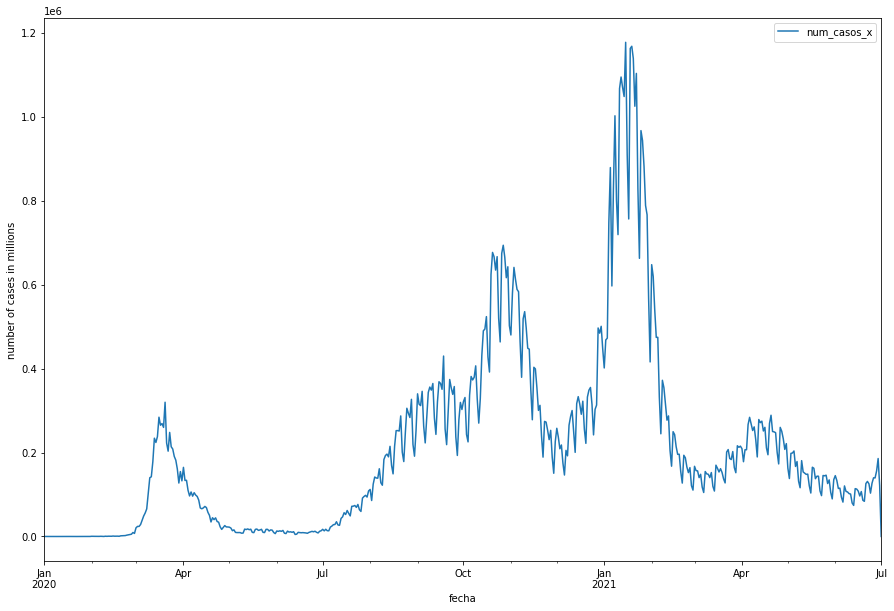

In [17]:
date_cases.plot(figsize = (15,10),ylabel = "number of cases in millions")

In [18]:
province_cases.reset_index(inplace=True)

Note that cases are not unique


<Figure size 432x288 with 0 Axes>

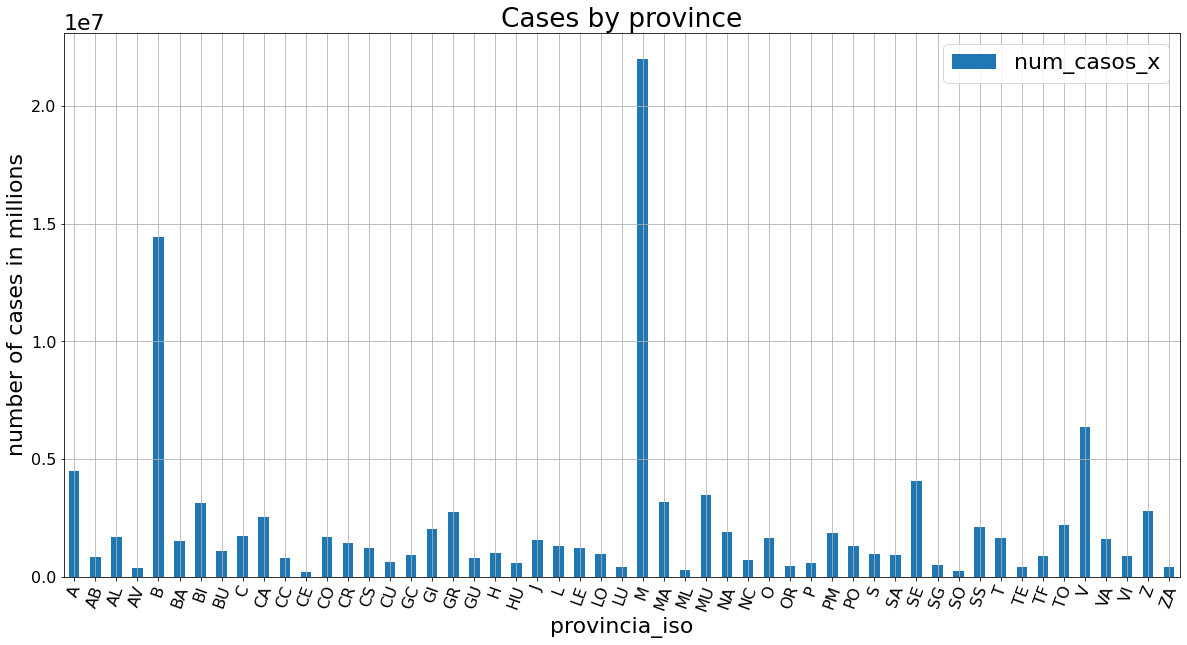

In [19]:
plt.figure()
plt.rcParams.update({'font.size': 22})
province_cases.plot.bar(x="provincia_iso", y='num_casos_x', ylabel = "number of cases in millions",rot=70, 
                        fontsize= 16,grid=True,figsize = (20,10),title="Cases by province");
print("Note that cases are not unique")

In [20]:
age_cases.reset_index(inplace=True)

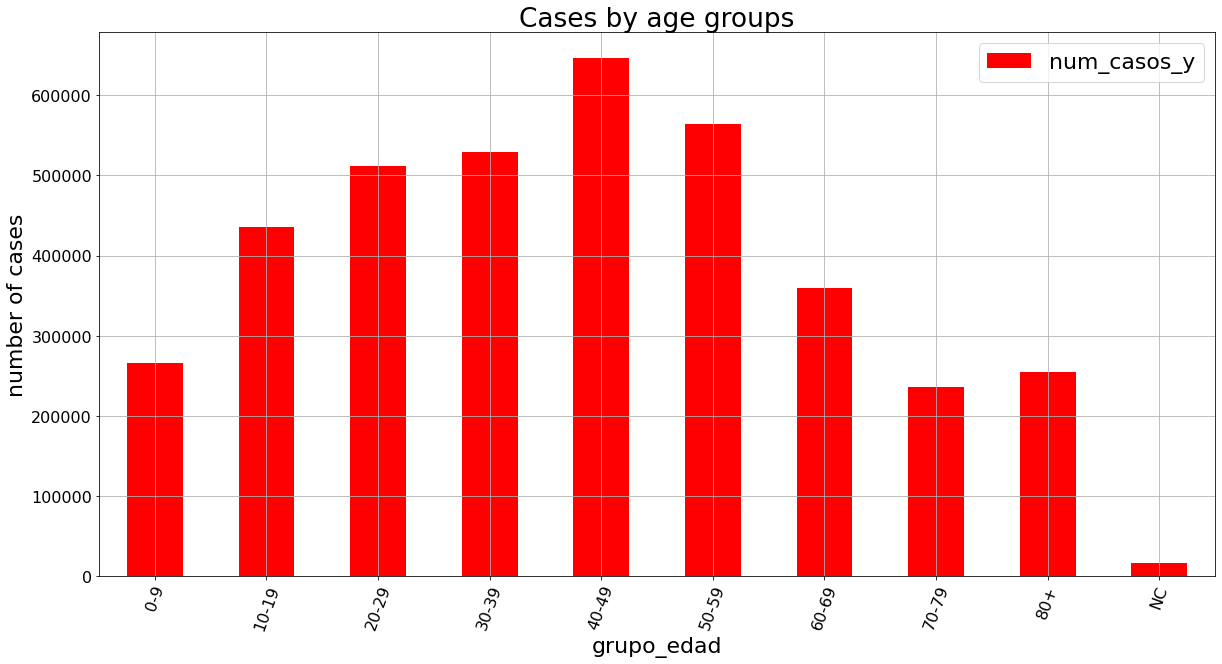

In [21]:
age_cases.plot.bar(x="grupo_edad", y='num_casos_y', ylabel = "number of cases",rot=70, 
                        fontsize= 16,grid=True,figsize = (20,10),title="Cases by age groups",color = "red");

In [22]:
print("data source do not agree with each other")
complete_df.loc[complete_df["num_casos_y"] > 0,:]

data source do not agree with each other


,provincia_iso,fecha,num_casos_x,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,dayyear,year,sexo,grupo_edad,num_casos_y,num_hosp,num_uci,num_def
27854,M,2020-01-18,2,2,0,0,0,0,18,2020,M,40-49,1,1,0,0
49082,TF,2020-01-31,0,0,0,0,0,0,31,2020,H,20-29,1,0,0,0
63094,PM,2020-02-09,0,0,0,0,0,0,40,2020,H,40-49,1,1,0,0
66913,B,2020-02-12,6,5,0,0,0,1,43,2020,M,30-39,1,0,0,0
67485,L,2020-02-12,0,0,0,0,0,0,43,2020,M,50-59,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871024,SS,2021-07-01,1,1,0,0,0,0,182,2021,H,40-49,1,0,0,0
871025,SS,2021-07-01,1,1,0,0,0,0,182,2021,H,50-59,1,0,0,0
871031,SS,2021-07-01,1,1,0,0,0,0,182,2021,M,10-19,10,0,0,0
871032,SS,2021-07-01,1,1,0,0,0,0,182,2021,M,20-29,4,0,0,0


In [23]:
#avoid duplicates with age and gender
complete_df = df1
complete_df.loc[:,'provincia_iso'] = complete_df.loc[:,'provincia_iso'].replace("","NA").fillna("NA")

### Overview of spain and neighboring countries demographic and covid over time 

In [24]:
DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/world_cov_data.csv")
df5 = pd.read_csv(DATA_PATH)

In [25]:
#Filtering fro a spain and neighboring countries
df5 = df5.loc[(df5["location"] == "Spain") | (df5["location"] == "France") | (df5["location"] == "Portugal"),:]

In [26]:
df5["location"].unique()

array(['France', 'Portugal', 'Spain'], dtype=object)

In [27]:
#replacing empty and null values
df5 = df5.replace("",0.0).fillna(0.0)
#delete unused columns
df5 = df5.drop("continent", axis = 1)

In [28]:
pd.set_option('display.max_columns', None)
df5.head()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
32459,FRA,France,24/01/2020,2.0,2.0,0.0,0.0,0.0,0.0,0.030,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.000,3.0,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,0.00
32460,FRA,France,25/01/2020,3.0,1.0,0.0,0.0,0.0,0.0,0.044,0.015,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,0.00
32461,FRA,France,26/01/2020,3.0,0.0,0.0,0.0,0.0,0.0,0.044,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,-5.66
32462,FRA,France,27/01/2020,3.0,0.0,0.0,0.0,0.0,0.0,0.044,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,3.0,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,0.00
32463,FRA,France,28/01/2020,4.0,1.0,0.0,0.0,0.0,0.0,0.059,0.015,0.0,0.0,0.0,0.0,0.0,1.0,0.015,4.0,0.059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67564251.0,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,0.00


In [29]:
df5.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
      

In [30]:
df5_spain =  df5.loc[(df5["location"] == "Spain"),:]
df5_france = df5.loc[(df5["location"] == "France"),["date","total_cases_per_million"]]
df5_portugal = df5.loc[(df5["location"] == "Portugal"),["date","total_cases_per_million"]]

df5_france.columns = ['date','France_cases_mil']
df5_portugal.columns = ['date','Portugal_cases_mil']

In [31]:
#Get the correct date format
df5_spain.iloc[:,2] = pd.to_datetime(df5_spain.iloc[:,2],format="%d/%m/%Y")
df5_france.iloc[:,0] = pd.to_datetime(df5_france.iloc[:,0],format="%d/%m/%Y")
df5_portugal.iloc[:,0] = pd.to_datetime(df5_portugal.iloc[:,0],format="%d/%m/%Y")

C:\Users\Pierre Computer\Documents\Python\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [32]:
df5_spain = df5_spain.sort_values(by='date')

In [33]:
df5_spain.tail()

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
85319,ESP,Spain,2021-06-30,3808960.0,9227.0,5132.571,80875.0,46.0,18.143,81466.745,197.349,109.776,1729.770,0.984,0.388,1.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42027584.0,25627278.0,17990526.0,747589.0,533388.0,89.89,54.81,38.48,11408.0,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,0.0,2.97,83.56,0.904,0.0
85320,ESP,Spain,2021-07-01,3821305.0,12345.0,6252.286,80883.0,8.0,16.714,81730.782,264.037,133.725,1729.941,0.171,0.357,1.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42792983.0,25948237.0,18466362.0,765399.0,569213.0,91.53,55.50,39.50,12174.0,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,0.0,2.97,83.56,0.904,0.0
85321,ESP,Spain,2021-07-02,3833868.0,12563.0,7343.571,80911.0,28.0,18.857,81999.482,268.700,157.066,1730.540,0.599,0.403,1.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,0.0,2.97,83.56,0.904,0.0
85322,ESP,Spain,2021-07-03,3833868.0,0.0,7343.571,80911.0,0.0,18.857,81999.482,0.000,157.066,1730.540,0.000,0.403,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,0.0,2.97,83.56,0.904,0.0
85323,ESP,Spain,2021-07-04,3833868.0,0.0,7343.571,80911.0,0.0,18.857,81999.482,0.000,157.066,1730.540,0.000,0.403,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,0.0,2.97,83.56,0.904,0.0


In [34]:
#delete unused columns
df_s = df5_spain.drop(["iso_code","location","new_cases_smoothed","new_deaths_smoothed","new_cases_smoothed_per_million","new_deaths_smoothed_per_million","weekly_icu_admissions","weekly_icu_admissions_per_million","weekly_hosp_admissions"
                                 ,"new_tests_smoothed","new_tests_smoothed_per_thousand","new_vaccinations_smoothed","new_vaccinations_smoothed_per_million","stringency_index"], axis = 1)
df_s
#we need state values
df_s = df_s.iloc[:,0:29]

In [35]:
#Merge the case sof neighboring countries 
global_covid = df_s.merge(df5_france, on = "date", how = "left").merge(df5_portugal, on = "date", how = "left")
#replacing empty and null values
global_covid = global_covid.replace("",0.0).fillna(0.0)

In [36]:
#delete duplicate columns with original dataset
gcovid = global_covid.iloc[:,28:]

In [37]:
gcovid['date'] = global_covid['date'] 

In [38]:
#Merge the case sof neighboring countries 
final_data = complete_df.merge(gcovid, left_on = "fecha", right_on = "date", how = "left")
final_data = final_data.dropna()

### Calendar events 

In [39]:
DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/holiday_spain.csv")
df6 = pd.read_csv(DATA_PATH)

In [40]:
df6 = df6.loc[df6["country"] == "Spain",["ds_holidays","holiday"]]
df6

,ds_holidays,holiday
195,2020-04-10,Viernes Santo
196,2020-05-01,Día del Trabajador
197,2020-08-15,Asunción de la Virgen
198,2020-10-12,Día de la Hispanidad
199,2020-11-01,Todos los Santos
200,2020-12-06,Día de la constitución Española
201,2020-12-08,La Inmaculada Concepción
202,2020-12-25,Navidad


### Other disease data

In [41]:
DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/other_deseases.xlsx")
df7 = pd.read_excel(DATA_PATH)

In [42]:
df7

,Unnamed: 0,Hipertensión,Dolor lumbar,Colesterol alto,Artrosis,EPOC,Salud mental,Diabetes
0,España,"19,6","12,4","20,8","8,0","2,3","14,8","8,0"
1,Andalucía,"19,8","9,6","14,4","7,6","3,1","10,8","9,1"
2,Aragón,"22,4","17,8","26,6","5,2","2,3","14,0","7,9"
3,"Asturias, Principado","21,0","19,0","23,6","6,2","1,6","18,5","8,2"
4,"Balears, Illes","18,7","22,5","24,3","9,7","2,6","25,5","7,4"
5,Canarias,"23,5","23,5","31,4","9,2","2,3","23,9","10,0"
6,Cantabria,"21,6","16,1","24,5","4,6","1,7","13,0","7,5"
7,Castilla y León,"23,0","16,5","27,7","11,2","2,3","19,5","8,3"
8,Castilla-La Mancha,"11,9","3,0","6,3","3,2","1,0","6,2","7,0"
9,Cataluña,"16,4","5,0","15,2","4,0","2,1","8,9","6,8"


### Population by state

In [43]:
DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/iso_provinces.xlsx")
df8 = pd.read_excel(DATA_PATH)
df8.loc[:,'provincia_iso'] = df8.loc[:,'provincia_iso'].replace("","NA").fillna("NA")
print(df8.head())
df8['provincia_iso'].unique()

  provincia  poblacion provincia_iso Communidad
0  Albacete     388270            AB         CM
1  Alicante    1879888             A         VC
2   Almería     727945            VI         PV
3     Araba     333940            AL         AN
4  Asturias    1018784             O         AS


array(['AB', 'A', 'VI', 'AL', 'O', 'AV', 'BA', 'PM', 'B', 'BI', 'BU',
       'CC', 'CA', 'S', 'CS', 'CR', 'CO', 'C', 'CU', 'SS', 'GI', 'GR',
       'GU', 'H', 'HU', 'J', 'LO', 'GC', 'LE', 'L', 'LU', 'M', 'MA', 'MU',
       'NA', 'OR', 'P', 'PO', 'SA', 'TF', 'SG', 'SE', 'SO', 'T', 'TE',
       'TO', 'V', 'VA', 'ZA', 'Z', 'CE', 'ML'], dtype=object)

In [44]:
final_data1 = final_data.merge(df8, on = "provincia_iso", how = "left")
final_data1 = final_data1.dropna()

In [45]:
#Check that all provinces are here 
print("number of provinces: {}".format(final_data1['provincia'].nunique()))

number of provinces: 52


In [46]:
#####to csv final dataset
final_data1.to_csv('data/prepared_dataset.csv')

In [47]:
final_data1

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,dayyear,year,people_fully_vaccinated_per_hundred,France_cases_mil,Portugal_cases_mil,date,provincia,poblacion,Communidad
0,A,2020-02-01,0,0,0,0,0,0,32,2020,0.0,0.089,0.000,2020-02-01,Alicante,1879888.0,VC
1,AB,2020-02-01,0,0,0,0,0,0,32,2020,0.0,0.089,0.000,2020-02-01,Albacete,388270.0,CM
2,AL,2020-02-01,0,0,0,0,0,0,32,2020,0.0,0.089,0.000,2020-02-01,Araba,333940.0,AN
3,AV,2020-02-01,0,0,0,0,0,0,32,2020,0.0,0.089,0.000,2020-02-01,Ávila,157664.0,CL
4,B,2020-02-01,7,6,0,0,0,1,32,2020,0.0,0.089,0.000,2020-02-01,Barcelona,5743402.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27396,V,2021-07-01,0,0,0,0,0,0,182,2021,39.5,86435.192,86499.102,2021-07-01,Valencia,2591875.0,VC
27397,VA,2021-07-01,0,0,0,0,0,0,182,2021,39.5,86435.192,86499.102,2021-07-01,Valladolid,520649.0,CL
27398,VI,2021-07-01,0,0,0,0,0,0,182,2021,39.5,86435.192,86499.102,2021-07-01,Almería,727945.0,PV
27399,Z,2021-07-01,0,0,0,0,0,0,182,2021,39.5,86435.192,86499.102,2021-07-01,Zaragoza,972528.0,AR


In [48]:
final_data1.loc[final_data1['provincia_iso'] == "NA",:]

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida,dayyear,year,people_fully_vaccinated_per_hundred,France_cases_mil,Portugal_cases_mil,date,provincia,poblacion,Communidad
31,NA,2020-02-01,0,0,0,0,0,0,32,2020,0.00,0.089,0.000,2020-02-01,Navarra,160321.0,NC
84,NA,2020-02-02,0,0,0,0,0,0,33,2020,0.00,0.089,0.000,2020-02-02,Navarra,160321.0,NC
137,NA,2020-02-03,0,0,0,0,0,0,34,2020,0.00,0.089,0.000,2020-02-03,Navarra,160321.0,NC
190,NA,2020-02-04,0,0,0,0,0,0,35,2020,0.00,0.089,0.000,2020-02-04,Navarra,160321.0,NC
243,NA,2020-02-05,0,0,0,0,0,0,36,2020,0.00,0.089,0.000,2020-02-05,Navarra,160321.0,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27167,NA,2021-06-27,30,11,0,19,0,0,178,2021,35.53,86317.423,85767.591,2021-06-27,Navarra,160321.0,NC
27220,NA,2021-06-28,46,17,0,29,0,0,179,2021,36.55,86325.089,85856.051,2021-06-28,Navarra,160321.0,NC
27273,NA,2021-06-29,38,14,0,24,0,0,180,2021,37.47,86375.338,86027.283,2021-06-29,Navarra,160321.0,NC
27326,NA,2021-06-30,16,11,0,5,0,0,181,2021,38.48,86395.763,86258.927,2021-06-30,Navarra,160321.0,NC
